---
* Task 3: Forest Cover Type Classification
* Omar Hamdy Abdelazim
----


# Libraries

In [28]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report , confusion_matrix , ConfusionMatrixDisplay, accuracy_score, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Functions

In [29]:
def check_shape(x_train,x_test,y_train,y_test):
    print('x_train shape --> ',x_train.shape )
    print('y_train shape --> ',y_train.shape )
    print('--'*20)
    print('x_test shape --> ',x_test.shape )
    print('y_test shape --> ',x_test.shape )

In [30]:
def train_model(model, x_train,x_test,y_train,y_test, print_report=True):
    model.fit(x_train,y_train)
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)

    if print_report:
        print('Classification Report for TRAIN DATA')
        print('--'*10)
        print(classification_report(y_train,train_pred))
        print('=='*20)
        print('Classification Report for TEST DATA')
        print('--'*10)
        print(classification_report(y_test,test_pred))

    cm_train = confusion_matrix(y_train,train_pred)
    cm_test = confusion_matrix(y_test,test_pred)
    return cm_train,cm_test

# Data

In [31]:
df = pd.read_csv('covtype.csv')
print(f'Shape: {df.shape}')

Shape: (581012, 55)


In [32]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


# EDA


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [34]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [35]:
cat_cols = []
num_cols = []
null_cols = []

for col in df.columns:
  if df[col].dtype == 'object':
    cat_cols.append(col)
  else:
    num_cols.append(col)

for col in df.columns:
  if df[col].isnull().any():
    null_cols.append(col)

print('categorical columns : ', cat_cols)
print('numerical columns : ', num_cols)
print('columns with null values : ', null_cols)

categorical columns :  []
numerical columns :  ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']
columns with null values :  []


In [36]:
df.isna().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [37]:
df.Cover_Type.value_counts()

,count
Cover_Type,
2,283301
1,211840
3,35754
7,20510
6,17367
5,9493
4,2747


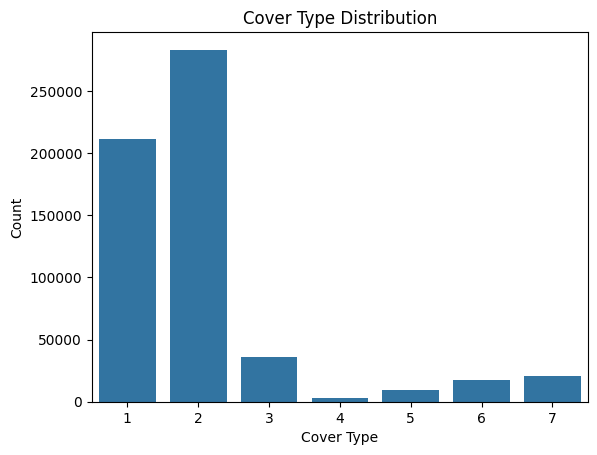

In [38]:
sns.countplot(x = 'Cover_Type', data = df)
plt.title('Cover Type Distribution')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

## 1. Preprocessing

### 1- Feature Selection

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

### 2- Handle Null Values

In [40]:
df.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [41]:
df.dropna(inplace=True)

In [42]:
df.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


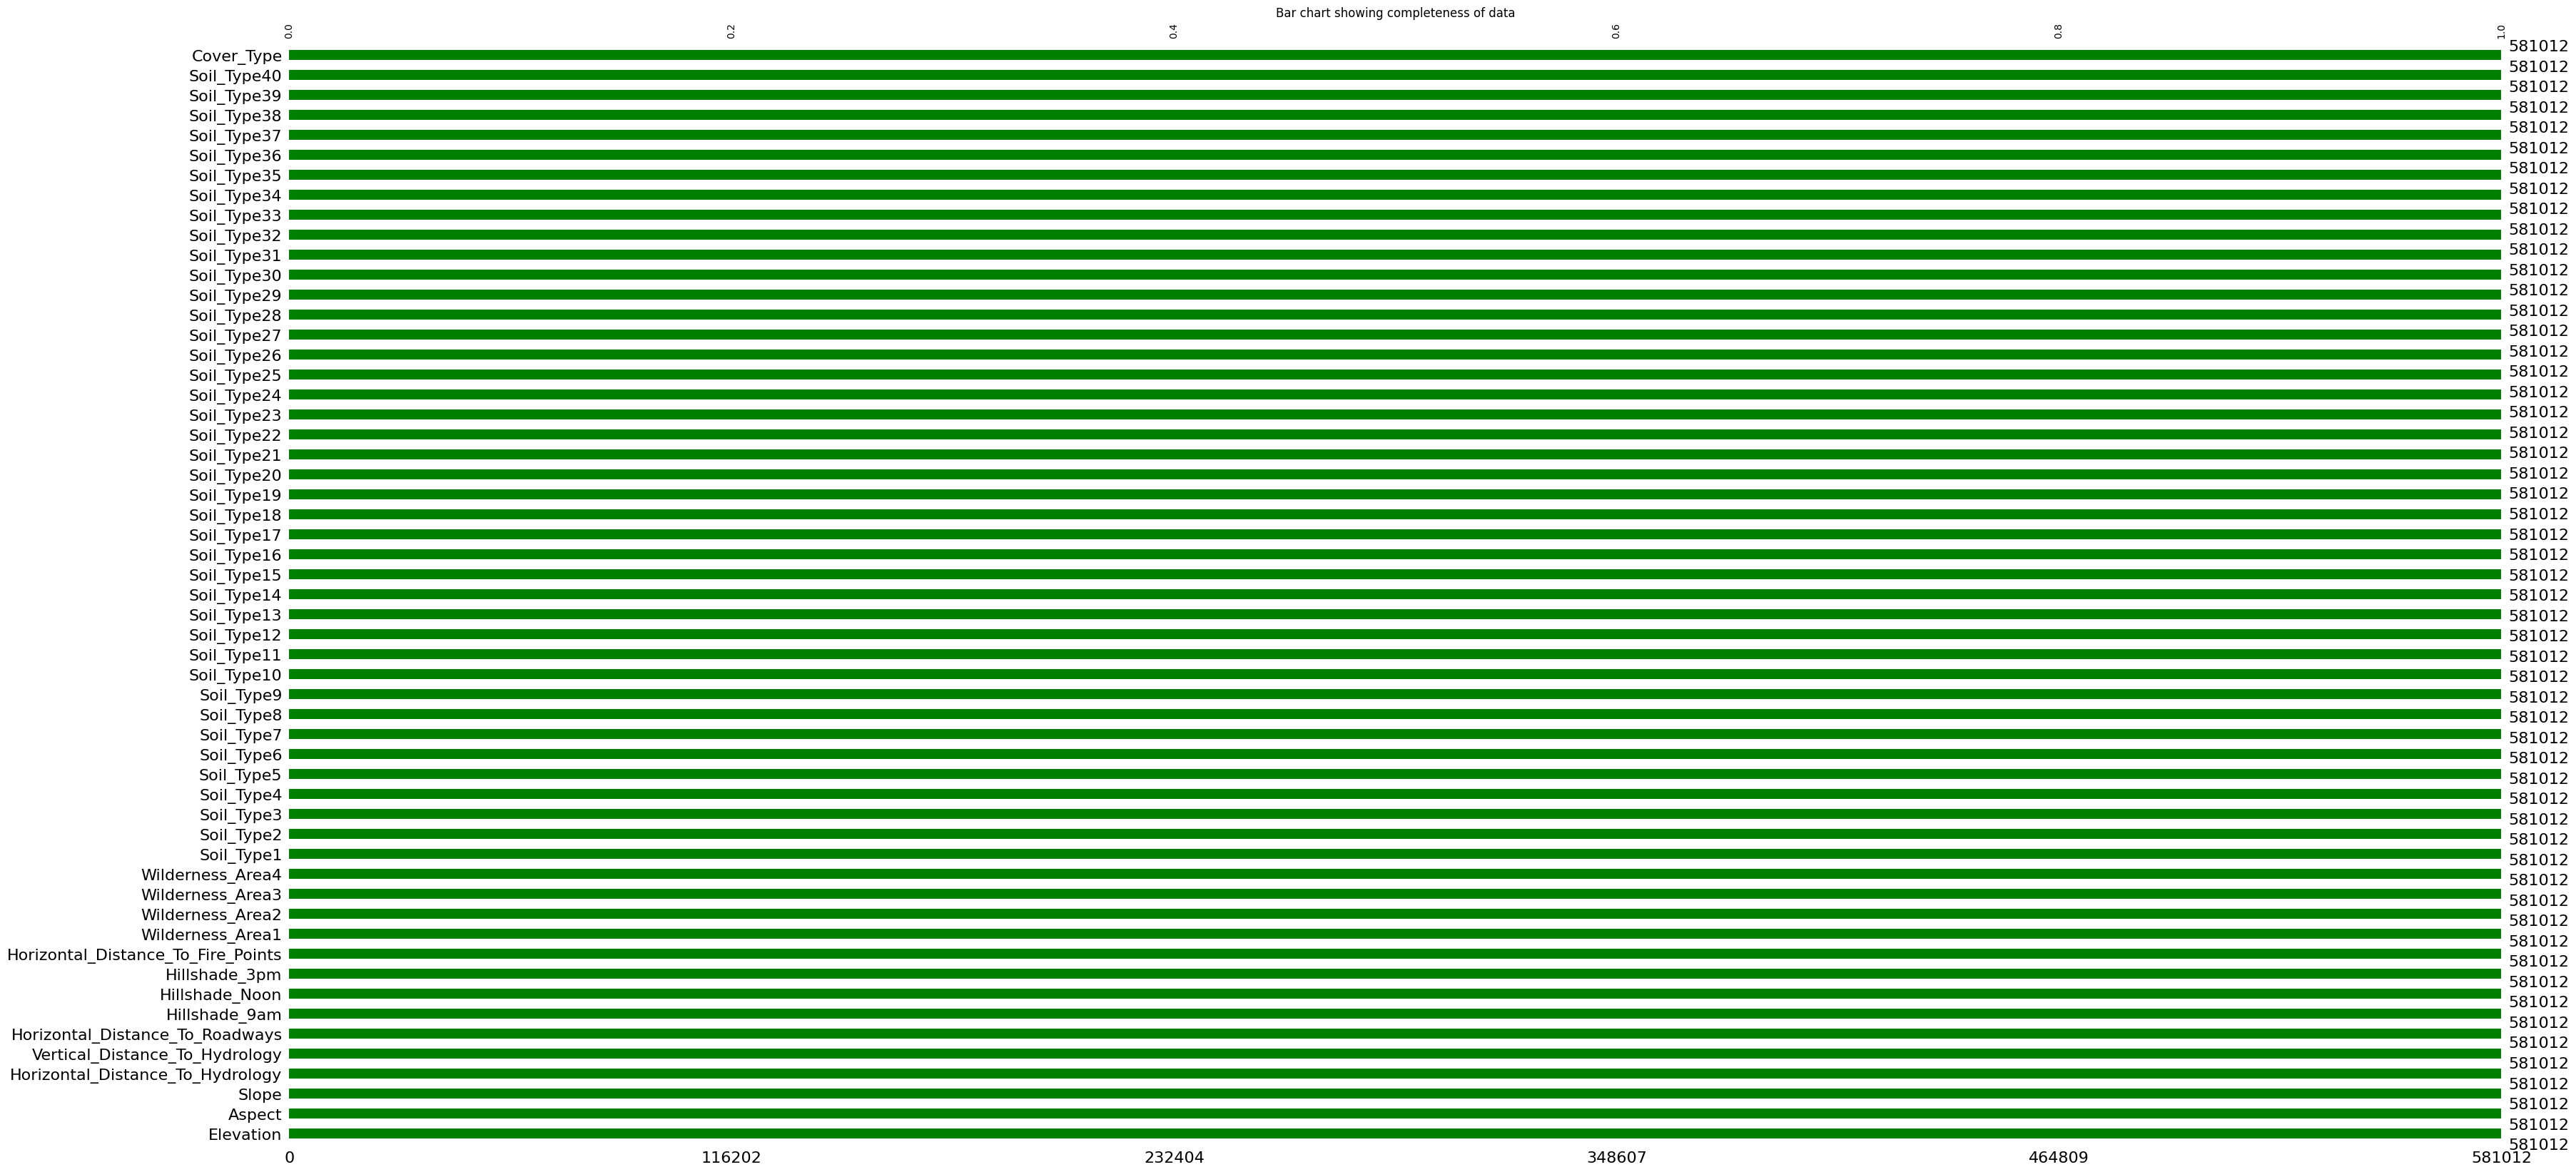

In [43]:
msno.bar(figsize=(40, 20), df = df, color = "green")
plt.title("Bar chart showing completeness of data")
plt.xticks(rotation = 90)
plt.show()

### 3- Duplicates

In [44]:
df.duplicated().sum()

np.int64(0)

### 4- Outliers

In [45]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


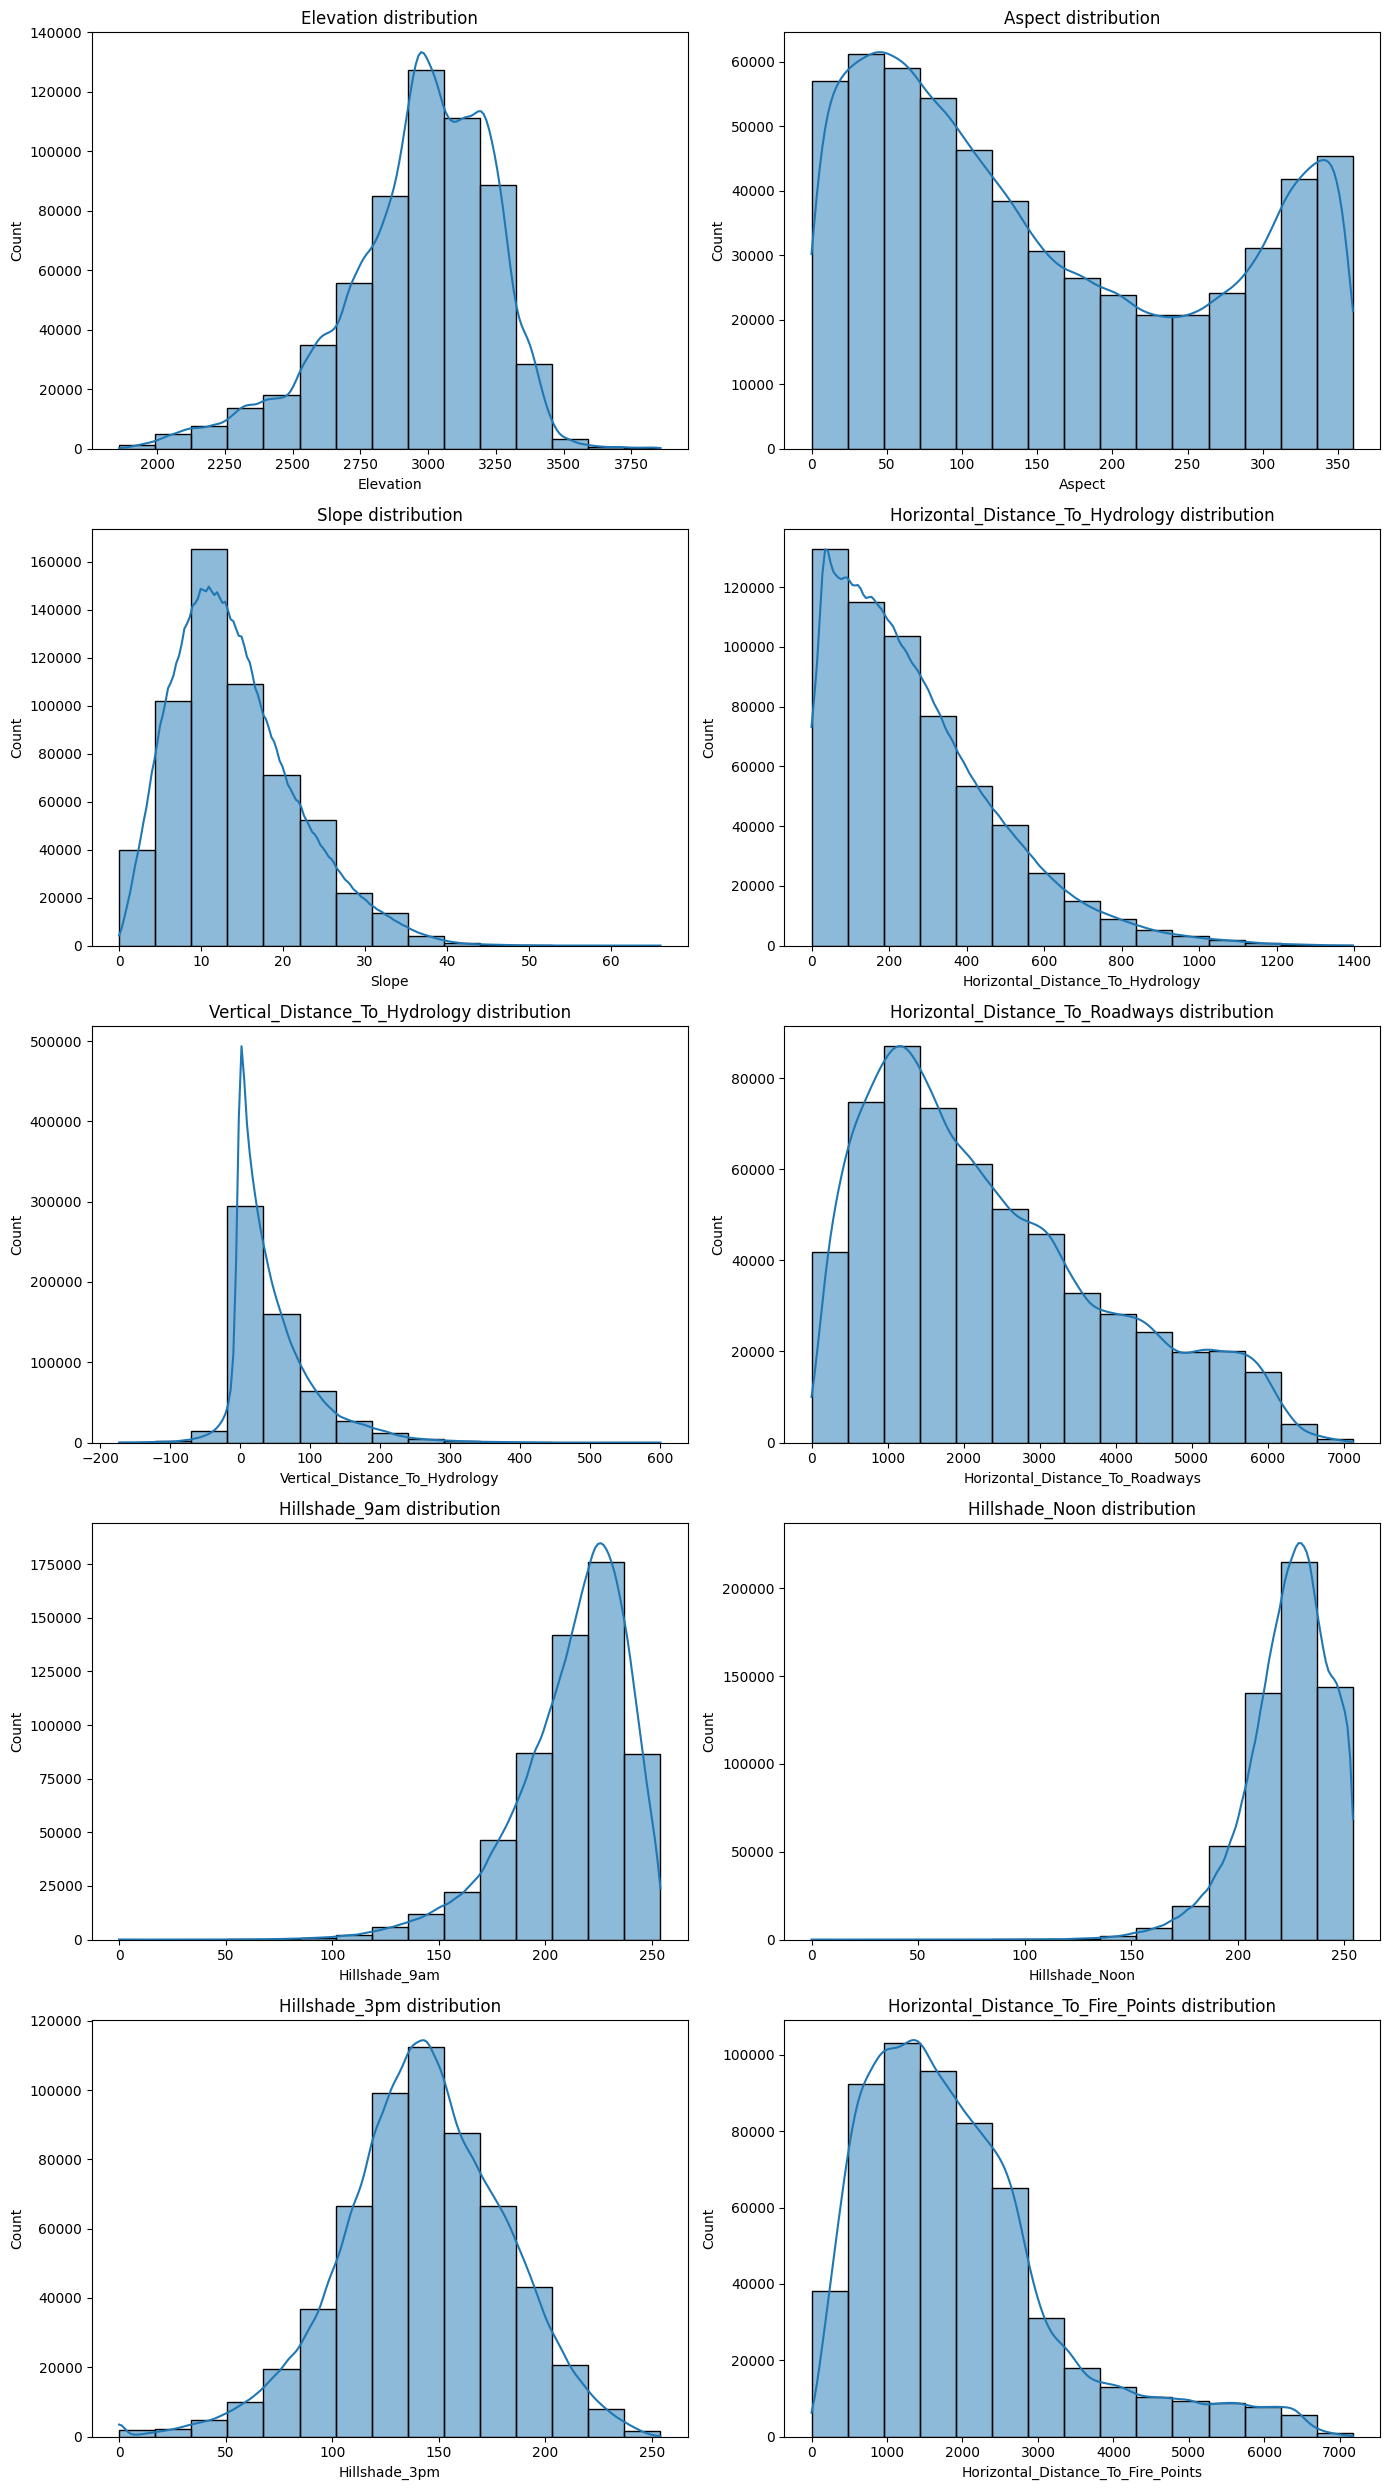

In [47]:
import math

cols = [
    'Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
    'Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

r = math.ceil(len(cols) / 2)
fig, axes = plt.subplots(r, 2, figsize=(14, 5*r))
for ax, c in zip(axes.flatten(), cols):
    sns.histplot(df[c], ax=ax, kde=True, bins=15, edgecolor='k')
    ax.set_title(f'{c} distribution')
fig.tight_layout()
plt.show()


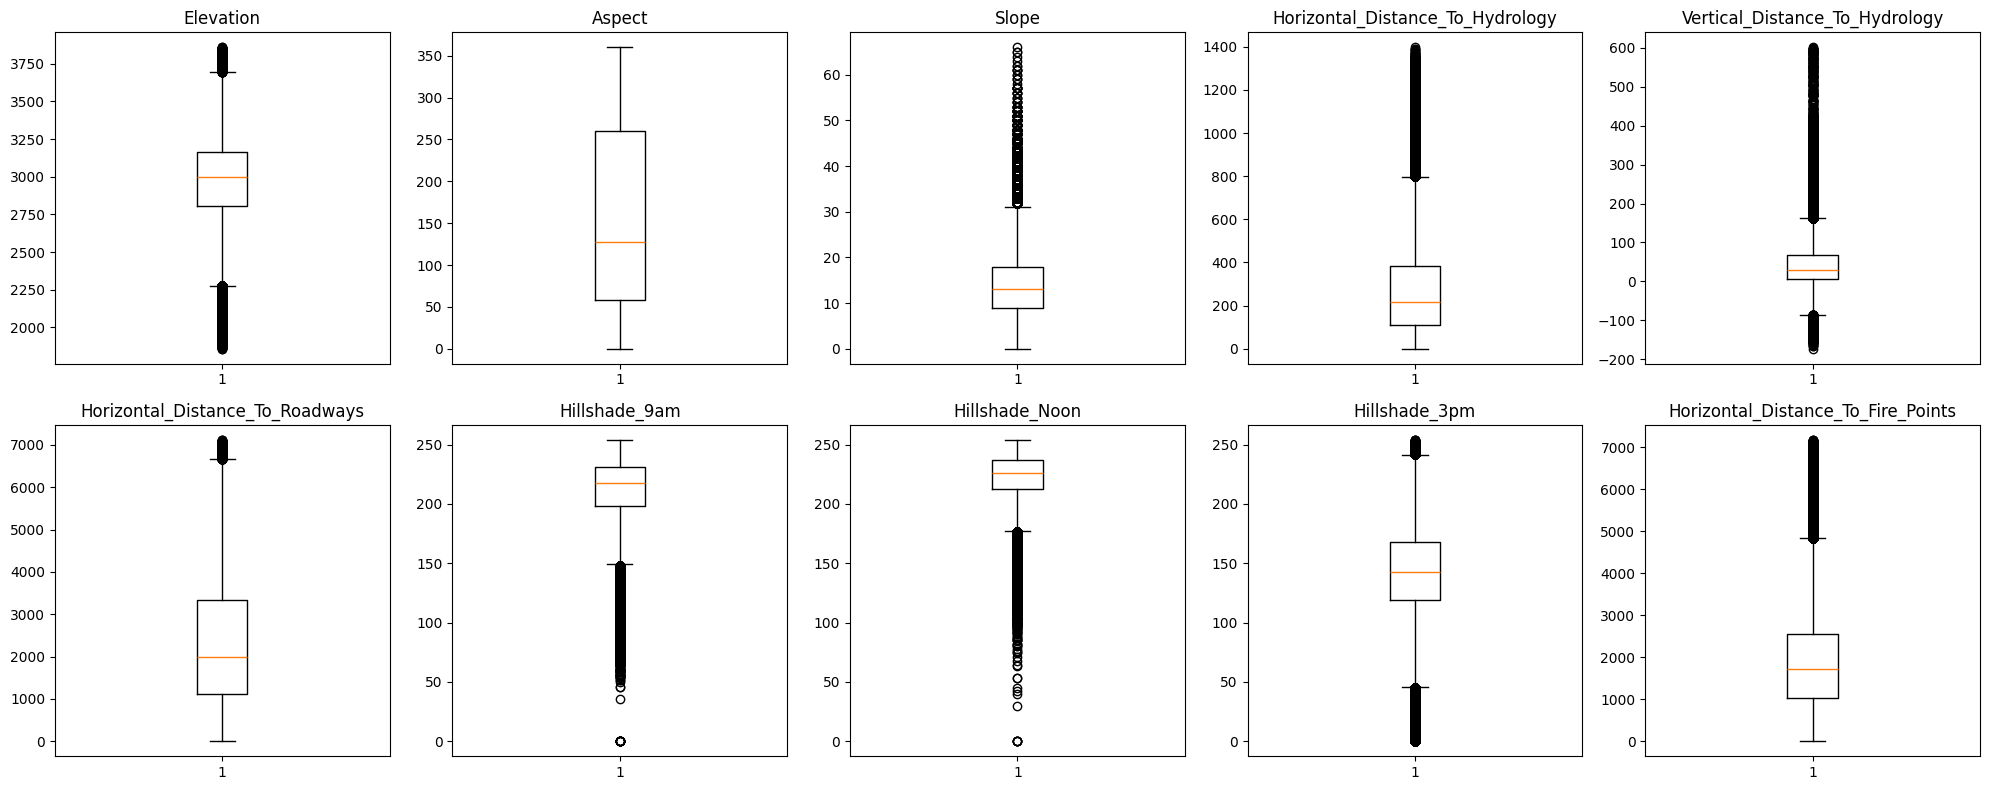

In [49]:
r = math.ceil(len(cols) / 5)
fig, axes = plt.subplots(r, 5, figsize=(20, 4*r))
for ax, c in zip(axes.flatten(), cols):
    ax.boxplot(df[c], vert=True)
    ax.set_title(c)
fig.tight_layout()
plt.show()

In [50]:
for c in cols:
    q1, q3 = df[c].quantile([0.25, 0.75])
    iqr = q3 - q1
    df[c] = df[c].clip(q1 - 1.5*iqr, q3 + 1.5*iqr)

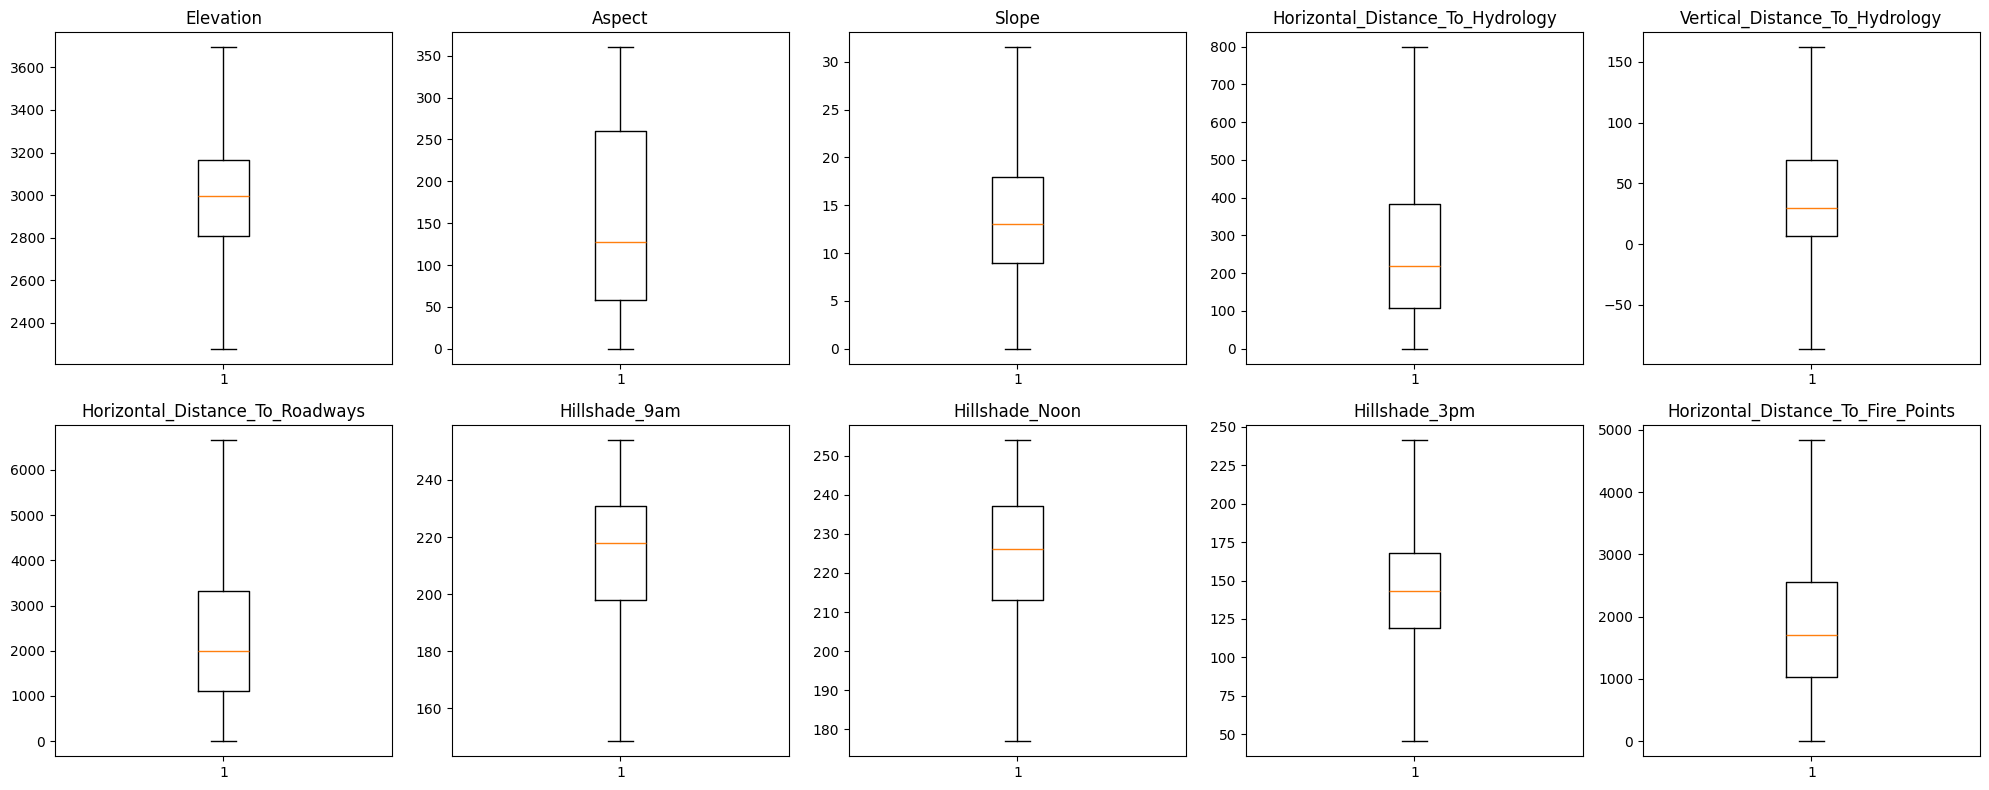

In [51]:
r = math.ceil(len(cols) / 5)
fig, axes = plt.subplots(r, 5, figsize=(20, 4*r))
for ax, c in zip(axes.flatten(), cols):
    ax.boxplot(df[c], vert=True)
    ax.set_title(c)
fig.tight_layout()
plt.show()

### 5- Encoding

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  int64  
 1   Aspect                              581012 non-null  int64  
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64  
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64  
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64  
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  int64  
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64  
 10  Wilderness_Area1                    581012 non-null  int64  
 11  Wilderness_Area2          

## 2. Model Building

### 1- Splitting

In [53]:
x = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
check_shape(x_train,x_test,y_train,y_test)

x_train shape -->  (464809, 54)
y_train shape -->  (464809,)
----------------------------------------
x_test shape -->  (116203, 54)
y_test shape -->  (116203, 54)


### 2- Train The model: DecisionTreeClassifier

In [56]:
dt_train_cm, dt_test_cm = train_model(DecisionTreeClassifier(), x_train,x_test,y_train,y_test)

Classification Report for TRAIN DATA
--------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    169283
           2       1.00      1.00      1.00    226801
           3       1.00      1.00      1.00     28633
           4       1.00      1.00      1.00      2221
           5       1.00      1.00      1.00      7498
           6       1.00      1.00      1.00     13878
           7       1.00      1.00      1.00     16495

    accuracy                           1.00    464809
   macro avg       1.00      1.00      1.00    464809
weighted avg       1.00      1.00      1.00    464809

Classification Report for TEST DATA
--------------------
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42557
           2       0.95      0.95      0.95     56500
           3       0.93      0.93      0.93      7121
           4       0.83      0.83      0.83       526
           5     

In [57]:
print('Train Confusion Matrix')
print(dt_train_cm)
print('--'*20)
print('Test Confusion Matrix')
print(dt_test_cm)

Train Confusion Matrix
[[169283      0      0      0      0      0      0]
 [     0 226801      0      0      0      0      0]
 [     0      0  28633      0      0      0      0]
 [     0      0      0   2221      0      0      0]
 [     0      0      0      0   7498      0      0]
 [     0      0      0      0      0  13878      0]
 [     0      0      0      0      0      0  16495]]
----------------------------------------
Test Confusion Matrix
[[39879  2441     1     0    45     3   188]
 [ 2340 53609   159     1   257    99    35]
 [    5   143  6598    63    21   290     1]
 [    0     3    68   436     0    19     0]
 [   44   293    27     0  1621    10     0]
 [    6   110   274    27     8  3064     0]
 [  173    22     0     0     1     0  3819]]


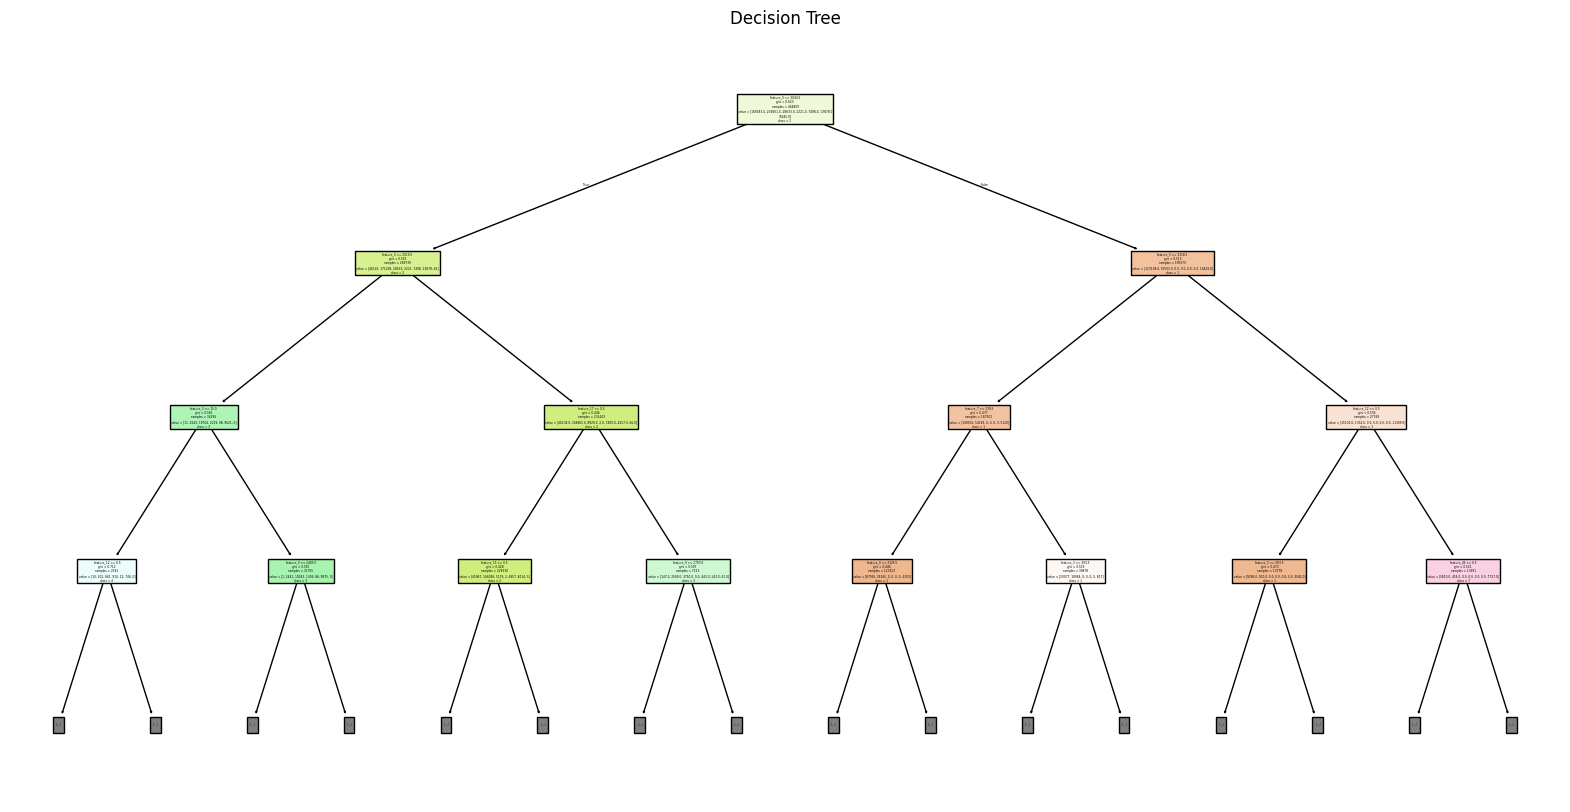

In [58]:
from sklearn import tree

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(dt_model,
               filled=True,
               feature_names=[f'feature_{i}' for i in range(x_train.shape[1])],
               class_names=[str(c) for c in dt_model.classes_],
               max_depth=3)
plt.title("Decision Tree")
plt.show()

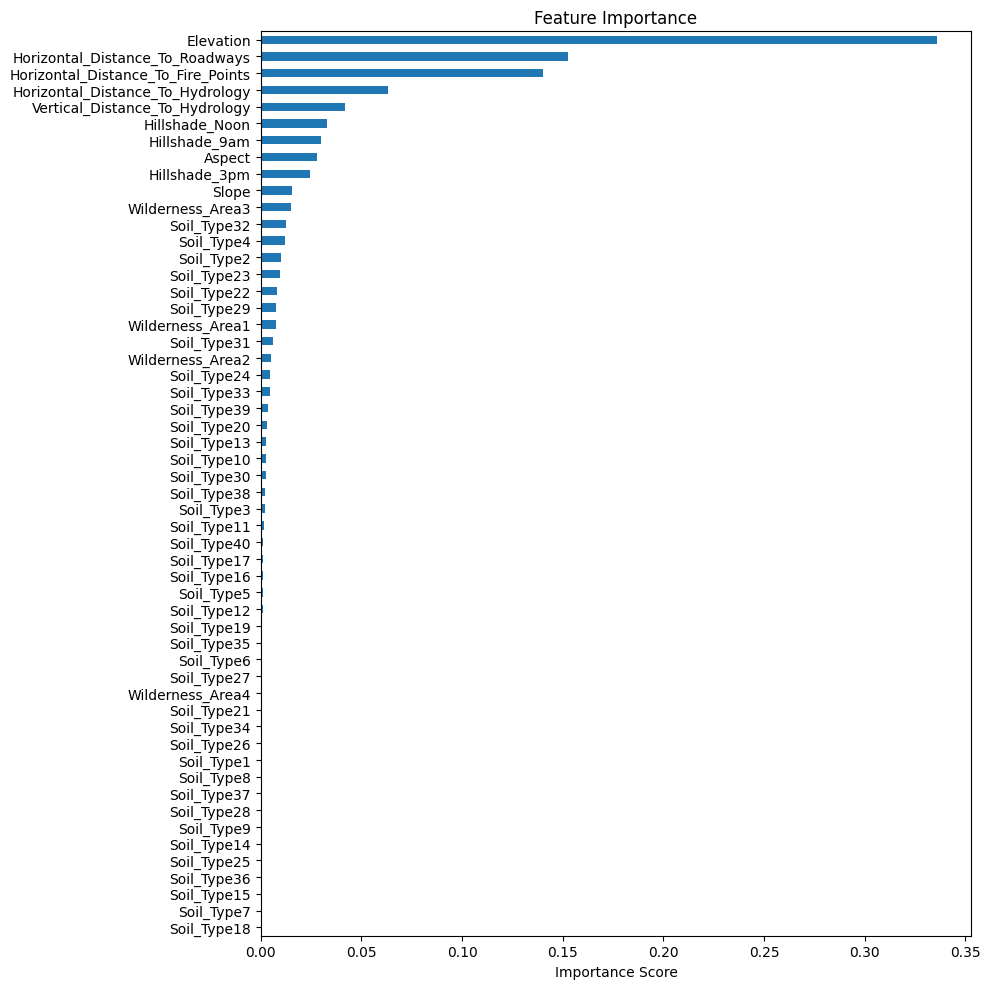

In [59]:
dtree_importance = pd.Series(dt_model.feature_importances_, index=x.columns)
dtree_importance.sort_values().plot(kind='barh', title='Feature Importance', figsize=(10, 10))
plt.xlabel("Importance Score")
plt.tight_layout()

### Bonus Work

In [60]:
best_model = None
best_accuracy = 0
best_model_results = None

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(
        objective="multi:softmax",
        num_class=7,
        eval_metric="mlogloss",
        random_state=42
    )
}

for name, model in models.items():
    print(f"Training {name}...")

    if name == "XGBoost":
        y_train_shift = y_train - 1
        y_test_shift  = y_test  - 1

        model.fit(x_train, y_train_shift)
        y_test_pred = model.predict(x_test) + 1
    else:
        model.fit(x_train, y_train)
        y_test_pred = model.predict(x_test)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy for {name}: {test_accuracy:.4f}")
    print("=" * 40)

    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model
        best_model_results = {
            "model_name": name,
            "test_accuracy": test_accuracy,
            "train_confusion_matrix": confusion_matrix(
                y_train, model.predict(x_train) + (1 if name == "XGBoost" else 0)
            ),
            "test_confusion_matrix": confusion_matrix(y_test, y_test_pred)
        }

print(f"\nBest Model: {best_model_results['model_name']}")
print(f"Best Test Accuracy: {best_model_results['test_accuracy']:.4f}")

Training Logistic Regression...
Test Accuracy for Logistic Regression: 0.6246
Training Decision Tree...
Test Accuracy for Decision Tree: 0.9380
Training Random Forest...
Test Accuracy for Random Forest: 0.9535
Training XGBoost...
Test Accuracy for XGBoost: 0.8737

Best Model: Random Forest
Best Test Accuracy: 0.9535
